## Sample headline

### Import necesarry library

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

### Import data

In [471]:
df_events = pd.read_csv("events.csv")
df_track_metadata = pd.read_csv("track_metadata.csv")

df_events.drop("Unnamed: 0", axis=1, inplace=True)
df_track_metadata.drop("Unnamed: 0", axis=1, inplace=True)

df_events.head(5)


,date,track_id,event_name,country_code
0,2020-08-20,178455b484681e9746ff48d1d9fe7c7c4097a384f7649b...,play,CH
1,2020-08-24,178455b484681e9746ff48d1d9fe7c7c4097a384f7649b...,play,RU
2,2020-08-19,178455b484681e9746ff48d1d9fe7c7c4097a384f7649b...,play,CH
3,2020-08-20,178455b484681e9746ff48d1d9fe7c7c4097a384f7649b...,play,US
4,2020-08-19,178455b484681e9746ff48d1d9fe7c7c4097a384f7649b...,play,GB


In [472]:
df_track_metadata.head(5)

,track_id,genre,sub_genre,bpm,has_vocals
0,c9a876b00e975a86b469a8d5775925479edb7fbd40007e...,Film,Supernatural,0,False
1,21d0dc563784f71c1e72cecee38dabedd2d3ce544c6495...,Electronica & Dance,Ambient,0,False
2,c1c2f1a406d81bd0b1df4b47d52da0e714f0c6381b3807...,Electronica & Dance,Dance,110,False
3,6881b9639bc7b64da086d753a2064812c8248eed26302a...,Film,Action,125,False
4,babc0f6706491a9612587dc4b6874a780f8b6cf101e35f...,Film,Action,110,False


### Basic EDA


In [15]:
#How many events samples
#total events = 76373
#total columns = 4
df_events.shape

(76373, 4)

In [16]:
#How many track samples
#total track sample = 2957 tracks
#total columns = 5
df_track_metadata.shape

(2957, 5)

In [477]:
# Dates - August 20, 2020 - August 26 2020
df_events["date"].unique()

array(['2020-08-20', '2020-08-24', '2020-08-19', '2020-08-25',
       '2020-08-22', '2020-08-23', '2020-08-21', '2020-08-26'],
      dtype=object)

In [18]:
# check number of unique values
df_track_metadata.nunique()

track_id      2957
genre            7
sub_genre       67
bpm            155
has_vocals       2
dtype: int64

In [19]:
df_events.nunique()

date               8
track_id        1968
event_name         2
country_code     180
dtype: int64

In [480]:
#check the categorical vs numerical variables
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76373 entries, 0 to 76372
Data columns (total 4 columns):
date            76373 non-null object
track_id        76373 non-null object
event_name      76373 non-null object
country_code    76332 non-null object
dtypes: object(4)
memory usage: 2.3+ MB


In [483]:
#check the categorical vs numerical variables
df_track_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2957 entries, 0 to 2956
Data columns (total 5 columns):
track_id      2957 non-null object
genre         2957 non-null object
sub_genre     2957 non-null object
bpm           2957 non-null int64
has_vocals    2957 non-null bool
dtypes: bool(1), int64(1), object(3)
memory usage: 95.4+ KB


In [581]:
#are there any missing data in the events log? Yes, country code
df_events.isnull().sum()

date             0
track_id         0
event_name       0
country_code    41
dtype: int64

In [579]:
#are there any missing data in the tracks file?
df_track_metadata.isnull().sum()

track_id      0
genre         0
sub_genre     0
bpm           0
has_vocals    0
dtype: int64

In [22]:
df_track_metadata['genre'].unique()

array(['Film', 'Electronica & Dance', 'Jazz', 'Rock', 'Rnb & Soul', 'Pop',
       'Hip Hop'], dtype=object)

In [566]:
#unique value

df_track_metadata['sub_genre'].unique()

array(['Supernatural', 'Ambient', 'Dance', 'Action', 'Modern Jazz',
       'House', 'Beautiful', 'Crime Scene', 'Drama', '1960s Rock',
       'Suspense', 'Metal', 'Soul', '1990s Pop', 'Traditional Jazz',
       'Indie Pop', 'Hard Rock', 'Mystery', '2010s Pop', 'Trap',
       'Alternative Hip Hop', 'Mainstream Hip Hop', 'RnB', '2010s Rock',
       '1950s Rock', 'Chase', 'Beats', 'Punk', 'Deep House', 'Disco',
       'Soft House', '1960s Pop', 'Adventure', '2000s Pop', 'Build',
       'Afrobeats', 'Future Bass', 'K-pop', '1970s Rock', 'Horror',
       'Old School RnB', 'Electro', 'Alternative', 'Nostalgia',
       'Smooth Jazz', 'Pulses', 'Techno & Trance', '1990s Rock',
       'Motown & Old School RnB', 'Main Title', '2000s Rock', 'Tragedy',
       'Drum n Bass', 'Old School Hip Hop', 'Synth Pop', '1980s Rock',
       'Strange & Weird', '1970s Pop', 'Big Band', '2020s Pop',
       '1980s Pop', 'Acid Jazz', 'Post Rock', 'Dubstep', 'Video Games',
       'Euro Pop', 'Gospel'], dtype=object

In [568]:
df_track_metadata['sub_genre'].nunique()

67

In [569]:
df_track_metadata['genre'].value_counts()

Electronica & Dance    809
Film                   696
Pop                    589
Hip Hop                336
Rock                   265
Jazz                   138
Rnb & Soul             124
Name: genre, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

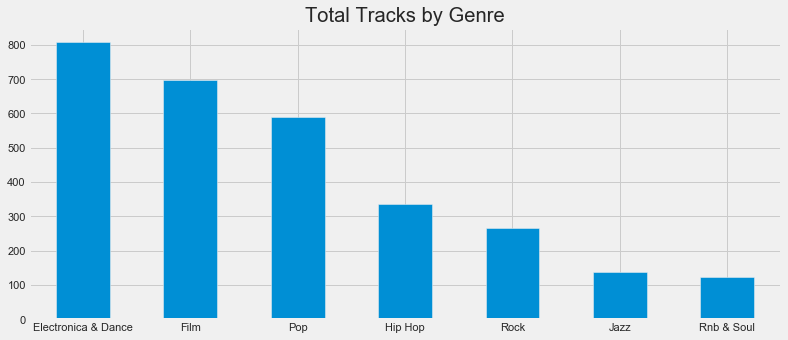

In [571]:
#Create plot for subgenre and genre
#Create plot for download vs total download

df_track_metadata['genre'].value_counts().plot(kind="bar", title="Total Tracks by Genre", figsize=(12,5))
plt.xticks(rotation=0)

In [574]:
data = df_track_metadata.groupby(['genre','sub_genre']).size().reset_index(name="total_tracks").sort_values(["genre","total_tracks"])
data

,genre,sub_genre,total_tracks
8,Electronica & Dance,Euro Pop,1
13,Electronica & Dance,Video Games,6
5,Electronica & Dance,Drum n Bass,9
6,Electronica & Dance,Dubstep,9
12,Electronica & Dance,Techno & Trance,13
4,Electronica & Dance,Disco,14
9,Electronica & Dance,Future Bass,25
2,Electronica & Dance,Dance,35
3,Electronica & Dance,Deep House,37
11,Electronica & Dance,Soft House,65


### Merge data

In [24]:
merge_data = pd.merge(df_track_metadata, df_events, left_on="track_id", right_on="track_id")
merge_data.head()
#assumption: records with same date, track id, event name and country are different users

,track_id,genre,sub_genre,bpm,has_vocals,date,event_name,country_code
0,c9a876b00e975a86b469a8d5775925479edb7fbd40007e...,Film,Supernatural,0,False,2020-08-23,play,RU
1,c9a876b00e975a86b469a8d5775925479edb7fbd40007e...,Film,Supernatural,0,False,2020-08-19,play,US
2,c9a876b00e975a86b469a8d5775925479edb7fbd40007e...,Film,Supernatural,0,False,2020-08-19,play,US
3,c9a876b00e975a86b469a8d5775925479edb7fbd40007e...,Film,Supernatural,0,False,2020-08-19,play,SE
4,c9a876b00e975a86b469a8d5775925479edb7fbd40007e...,Film,Supernatural,0,False,2020-08-26,play,MX


In [27]:
merge_data.shape

(76373, 8)

### 1. For each of the genre found in the tracks table, what was the most downloaded sub-genre, and what was the most played sub-genre?

In [30]:
play_event = merge_data[merge_data['event_name'] == 'play']
download_event = merge_data[merge_data['event_name'] == 'download']


In [31]:
play_event.head(5)

,track_id,genre,sub_genre,bpm,has_vocals,date,event_name,country_code
0,c9a876b00e975a86b469a8d5775925479edb7fbd40007e...,Film,Supernatural,0,False,2020-08-23,play,RU
1,c9a876b00e975a86b469a8d5775925479edb7fbd40007e...,Film,Supernatural,0,False,2020-08-19,play,US
2,c9a876b00e975a86b469a8d5775925479edb7fbd40007e...,Film,Supernatural,0,False,2020-08-19,play,US
3,c9a876b00e975a86b469a8d5775925479edb7fbd40007e...,Film,Supernatural,0,False,2020-08-19,play,SE
4,c9a876b00e975a86b469a8d5775925479edb7fbd40007e...,Film,Supernatural,0,False,2020-08-26,play,MX


In [267]:
download_event.head(5)


,track_id,genre,sub_genre,bpm,has_vocals,date,event_name,country_code
54,21d0dc563784f71c1e72cecee38dabedd2d3ce544c6495...,Electronica & Dance,Ambient,0,False,2020-08-25,download,JP
55,21d0dc563784f71c1e72cecee38dabedd2d3ce544c6495...,Electronica & Dance,Ambient,0,False,2020-08-25,download,US
56,21d0dc563784f71c1e72cecee38dabedd2d3ce544c6495...,Electronica & Dance,Ambient,0,False,2020-08-25,download,PE
57,21d0dc563784f71c1e72cecee38dabedd2d3ce544c6495...,Electronica & Dance,Ambient,0,False,2020-08-24,download,RU
58,21d0dc563784f71c1e72cecee38dabedd2d3ce544c6495...,Electronica & Dance,Ambient,0,False,2020-08-24,download,AE


In [512]:
total_download = download_event.groupby(['genre','sub_genre']).size().reset_index(name='total_download_events')
total_play = play_event.groupby(['genre','sub_genre']).size().reset_index(name='total_play_events')
total_download.to_excel("total_download.xlsx")

In [535]:
total_download['genre'].nunique()
total_download.sort_values(['genre','total_download_events','sub_genre'], ascending=False)
total_download['percent'] = total_download['total_download_events'].groupby(total_download['genre']).transform(lambda x: x/x.sum()*100)


In [537]:
total_play.sort_values(['genre','total_play_events','sub_genre'], ascending=False)
total_play['percent'] = total_play['total_play_events'].groupby(total_play['genre']).transform(lambda x: x/x.sum()*100)


In [538]:
total_download.sort_values(['genre','total_download_events'], ascending=False)

,genre,sub_genre,total_download_events,percent
57,Rock,Alternative,45,20.000000
59,Rock,Metal,33,14.666667
56,Rock,2010s Rock,30,13.333333
53,Rock,1970s Rock,25,11.111111
55,Rock,2000s Rock,23,10.222222
58,Rock,Hard Rock,22,9.777778
61,Rock,Punk,22,9.777778
54,Rock,1990s Rock,8,3.555556
60,Rock,Post Rock,7,3.111111
52,Rock,1960s Rock,6,2.666667


### The most downloaded sub-genre

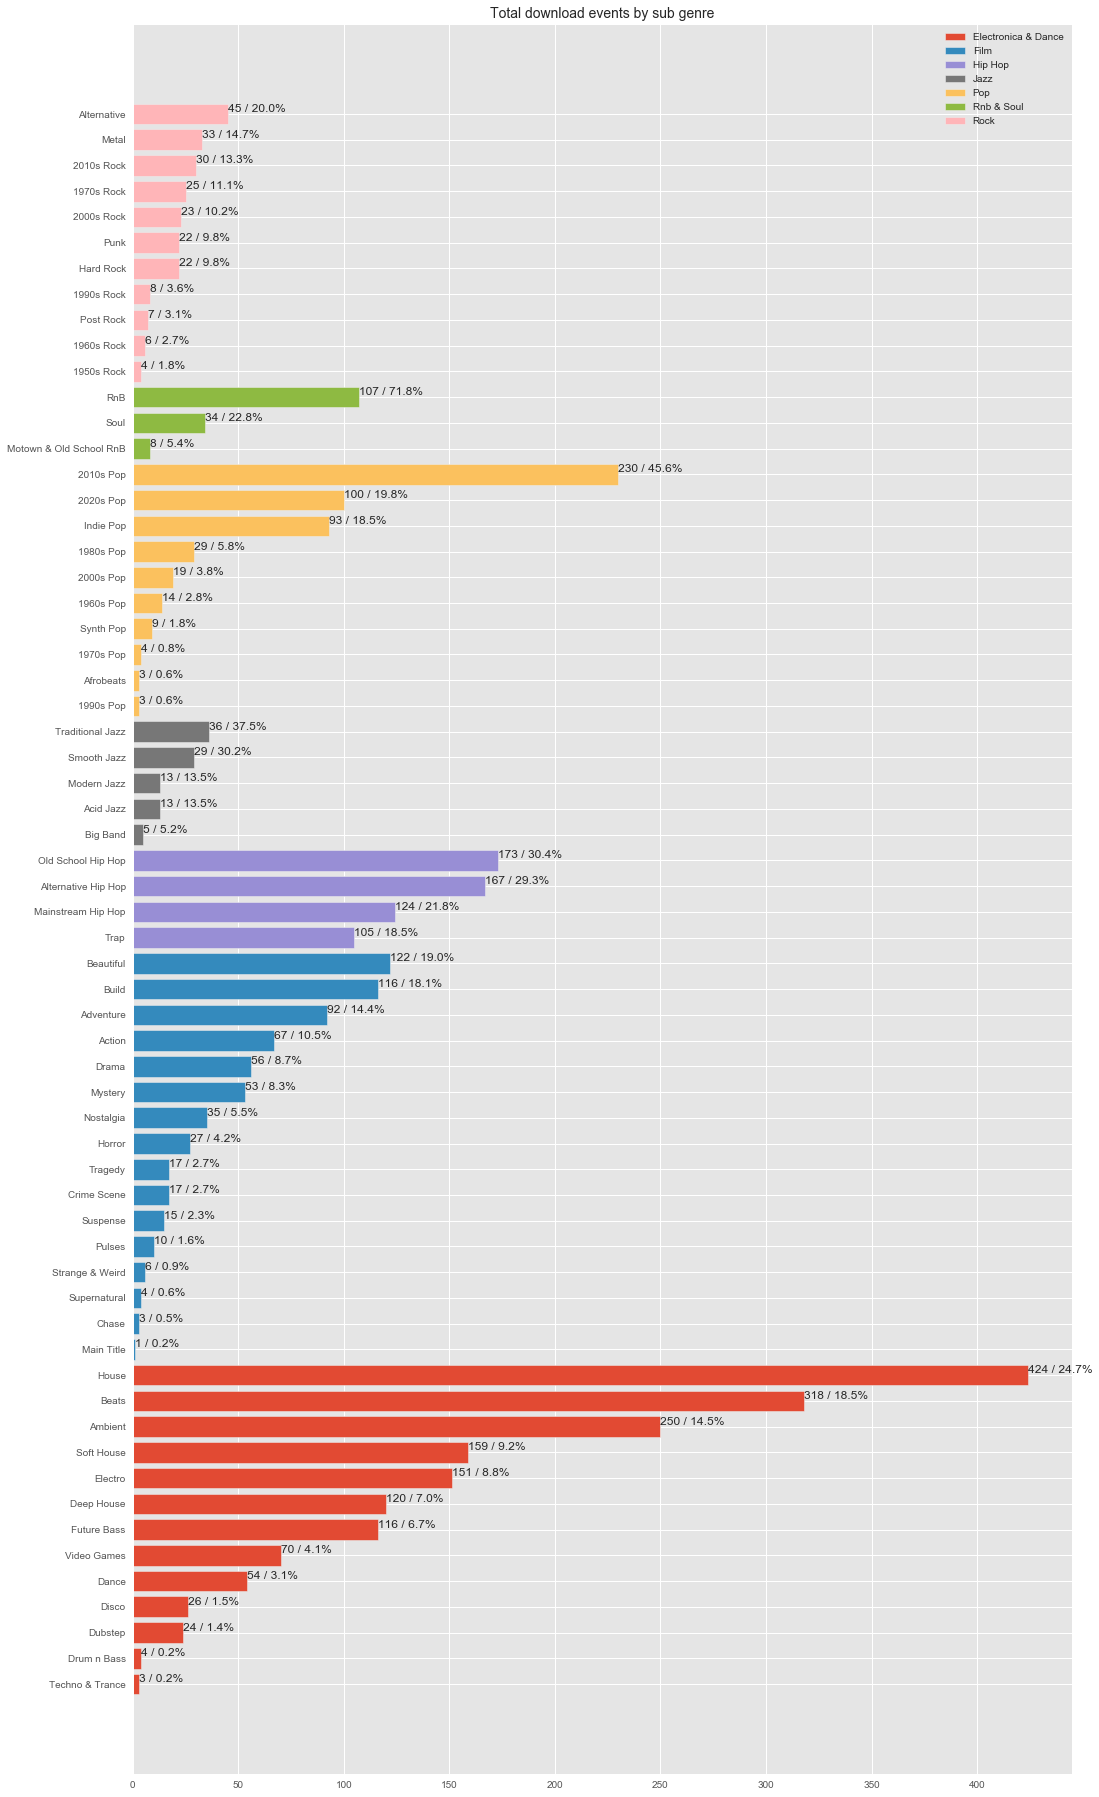

In [658]:
#fig, axs = plt.subplots(7, sharex=True, sharey=True)

fig = plt.gcf()
fig.set_size_inches(15, 30)
plt.style.use("ggplot")
  
for i in range(0, total_download['genre'].nunique()):
    #print(total_download['genre'].unique()[i])
    genre_str = total_download['genre'].unique()[i]
    df = total_download[total_download['genre'] == genre_str].sort_values(['genre','total_download_events','sub_genre'], ascending=True)
    df['sub_genre'] = df['sub_genre']
    plt.barh(df['sub_genre'], df['total_download_events'], label=genre_str)
    plt.title('Total download events by sub genre', fontsize=14)

plt.legend()
tf = total_download.sort_values(['genre','total_download_events','sub_genre'], ascending=False)    

j = len(tf)-1
for i in range(len(tf)):
    plt.text(tf.iloc[i,2],j, str( tf.iloc[i,2]) + ' / ' + str (round (tf.iloc[i, 3], 1) ) + '%', ha="left", va="bottom", fontsize=12)
    j = j-1

### The most played genre

In [534]:
total_play.sort_values(['genre','total_play_events','sub_genre'], ascending=False)

,genre,sub_genre,total_play_events,percent
60,Rock,Alternative,1049,25.473531
62,Rock,Metal,776,18.844099
59,Rock,2010s Rock,506,12.287518
58,Rock,2000s Rock,503,12.214667
61,Rock,Hard Rock,342,8.305002
55,Rock,1970s Rock,311,7.552210
64,Rock,Punk,254,6.168043
57,Rock,1990s Rock,130,3.156872
63,Rock,Post Rock,98,2.379796
54,Rock,1960s Rock,88,2.136960


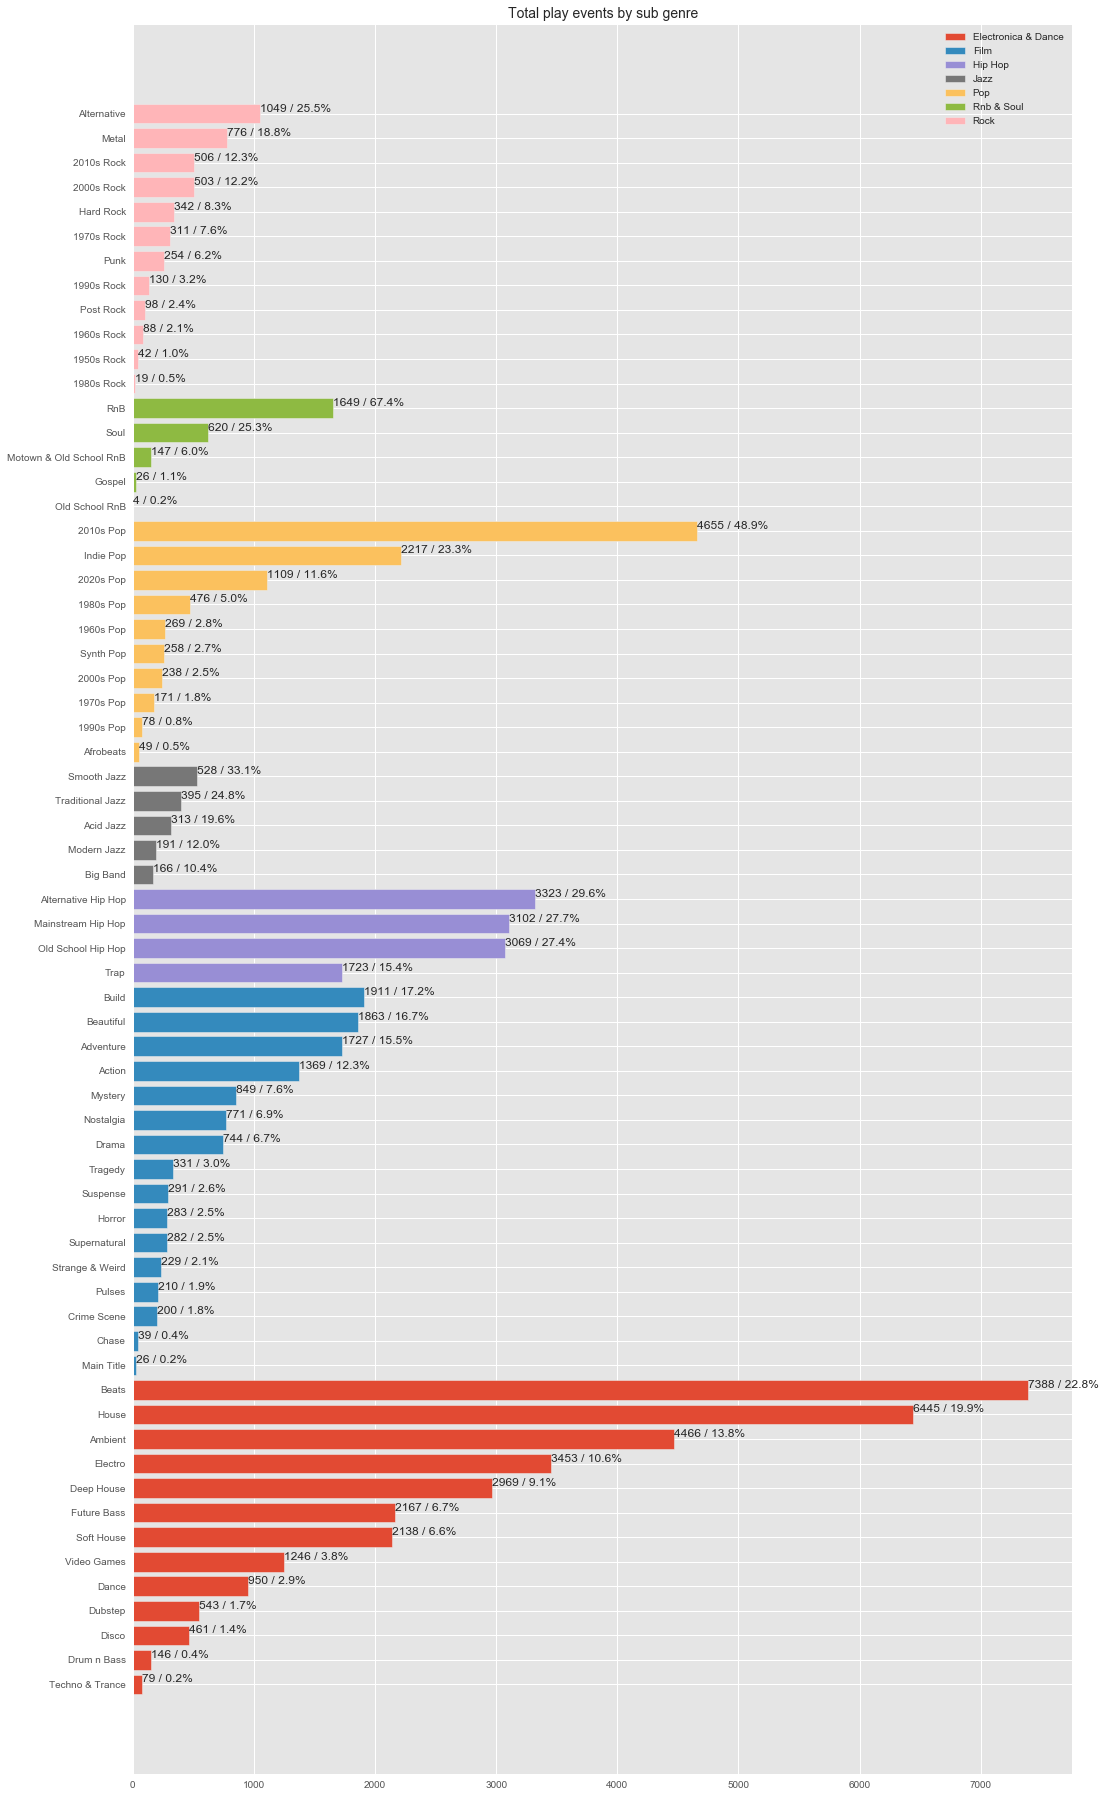

In [662]:
#fig, axs = plt.subplots(7, sharex=True, sharey=True)
plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(15, 30)

for i in range(0, total_play['genre'].nunique()):
    genre_str = total_play['genre'].unique()[i]
    df = total_play[total_play['genre'] == genre_str].sort_values(['genre','total_play_events','sub_genre'], ascending=True)
    plt.barh(df['sub_genre'], df['total_play_events'], label=genre_str)
    plt.legend()
    plt.title('Total play events by sub genre', fontsize=14)


tf = total_play.sort_values(['genre','total_play_events','sub_genre'], ascending=False)    

j = len(tf)-1
for i in range(len(tf)):
    plt.text(tf.iloc[i,2],j, str( tf.iloc[i,2]) + ' / ' + str (round (tf.iloc[i, 3], 1) ) + '%', ha="left", va="bottom", fontsize=12)
    j = j-1

### Question 1 - for each of the genres found in the tracks table, what was the most downloaded sub-genre, and what was the most played sub-genre?


Event | EDM | Film | Pop | HipHop| Jazz | RnBnSoul | Rock
---  | --- | --- | --- | --- | --- | --- |  --- | 
Most Played | Beats | Build | 2010sPop | Alternative HipHop | Smooth Jazz | RnB | Alternative
Most Downloaded | House | Beautiful | 2010sPop | Old School Hip hop |   Traditional Jazz | RnB | Alternative

In [168]:


#total_download[total_download['genre'] == 'Electronica & Dance'].plot(kind='barh', figsize=(20,5))

#total_download.sort_values('total_download_events', inplace=True)
#total_download.plot(kind='barh', x='genre', y='total_download_events', color='b', figsize=(15,20))
#plt.barh(total_download['genre'], total_download['total_download_events'])
#plt.ylabel('total_download')
#plt.title('Total download by genre', fontsize=13)

df = total_download[total_download['genre'] == genre_str].sort_values(['genre','total_download_events','sub_genre'], ascending=True)
print(df)

   genre    sub_genre  total_download_events
51  Rock   1950s Rock                      4
52  Rock   1960s Rock                      6
60  Rock    Post Rock                      7
54  Rock   1990s Rock                      8
58  Rock    Hard Rock                     22
61  Rock         Punk                     22
55  Rock   2000s Rock                     23
53  Rock   1970s Rock                     25
56  Rock   2010s Rock                     30
59  Rock        Metal                     33
57  Rock  Alternative                     45


In [661]:
tf = total_download.sort_values(['genre','total_download_events','sub_genre'], ascending=False)    
print(tf.iloc[0,2])
#print(tf['total_download_events'][0])
tf.head(5)

45


,genre,sub_genre,total_download_events,percent
57,Rock,Alternative,45,20.000000
59,Rock,Metal,33,14.666667
56,Rock,2010s Rock,30,13.333333
53,Rock,1970s Rock,25,11.111111
55,Rock,2000s Rock,23,10.222222


### 2. How do download per genre compare with the tracks we have in our library?

In [469]:
total_download_by_genre = download_event.groupby('genre').size().reset_index(name='total_download')
total_tracks = df_track_metadata.groupby('genre').size().reset_index(name='total_tracks')
total_download_to_track_ratio = pd.merge(total_download_by_genre, total_tracks, left_on='genre', right_on='genre')
total_download_to_track_ratio['ratio'] = total_download_to_track_ratio['total_download'] /  total_download_to_track_ratio['total_tracks']

total_download_to_track_ratio

,genre,total_download,total_tracks,ratio
0,Electronica & Dance,1719,809,2.124845
1,Film,641,696,0.920977
2,Hip Hop,569,336,1.693452
3,Jazz,96,138,0.695652
4,Pop,504,589,0.855688
5,Rnb & Soul,149,124,1.201613
6,Rock,225,265,0.849057


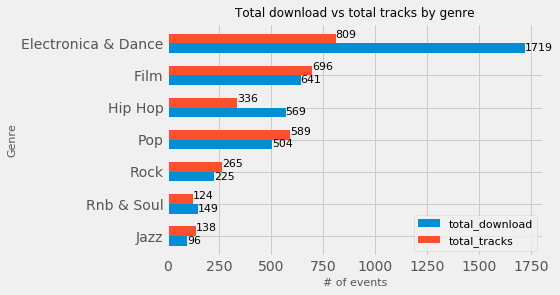

In [364]:
total_download_to_track_ratio = total_download_to_track_ratio.sort_values('total_download') 

x = np.arange(len(total_download_to_track_ratio))
width = 0.3
plt.barh(x - width/2, total_download_to_track_ratio['total_download'], width, label='total_download')
plt.barh(x + width/2, total_download_to_track_ratio['total_tracks'], width, label='total_tracks')
plt.yticks(x, total_download_to_track_ratio['genre'].unique())
plt.legend(fontsize=11)
plt.title("Total download vs total tracks by genre", fontsize=12)
plt.xlabel("# of events", fontsize=11)
plt.ylabel("Genre", fontsize=11)


tf = total_download_to_track_ratio.sort_values(['total_download'], ascending=False)   
j = len(tf)-1
for i in range(len(tf)):
    plt.text(tf.iloc[i,1],j-width, str( tf.iloc[i,1]), ha="left", va="bottom", fontsize=11)
    plt.text(tf.iloc[i,2],j+0.1, str( tf.iloc[i,2]), ha="left", va="bottom", fontsize=11)
    j = j-1


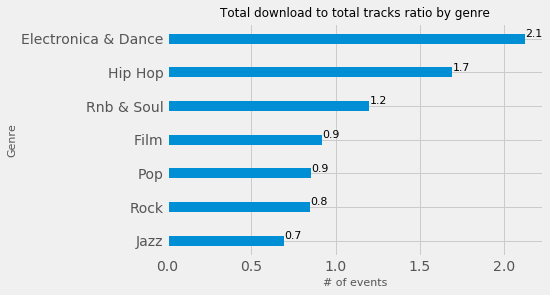

In [373]:
total_download_to_track_ratio = total_download_to_track_ratio.sort_values('ratio') 

x = np.arange(len(total_download_to_track_ratio))
width = 0.3
plt.barh(total_download_to_track_ratio['genre'], total_download_to_track_ratio['ratio'], width, label='total_download')
plt.title("Total download to total tracks ratio by genre", fontsize=12)
plt.xlabel("# of events", fontsize=11)
plt.ylabel("Genre", fontsize=11)


tf = total_download_to_track_ratio.sort_values(['ratio'], ascending=False)   
j = len(tf)-1
for i in range(len(tf)):
    plt.text(tf.iloc[i,3],j, str( round(tf.iloc[i,3],1)), ha="left", va="bottom", fontsize=11)
    j = j-1


#### How do the downloads per genre compare with the tracks we have in our library?

#### Question 2: For EDM, HipHip, RnB and Soul - there are more downloads than the total track. For instance, EDM is downloaded 2.1 times than # of track available, HipHip is downloaded 1.7 times than the # of track available


### Correlation

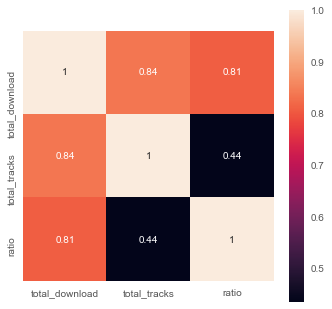

In [664]:
#Is there any correlation between the number of tracks with the number of download? 

corr = total_download_to_track_ratio.corr()
sns.heatmap(corr, annot=True, square=True)

Text(0, 0.5, 'total tracks')

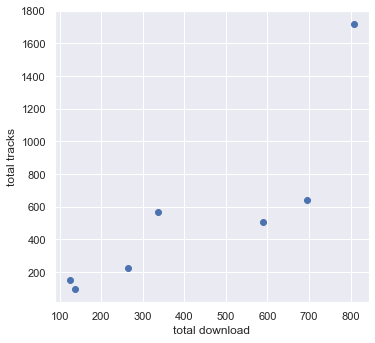

In [650]:
fig = plt.gcf()
fig.set_size_inches(5, 5)

plt.scatter(total_download_to_track_ratio['total_tracks'], total_download_to_track_ratio['total_download'])
plt.xlabel('total download')
plt.ylabel('total tracks')

### 3. How about on subgenre level?

In [ ]:
plt.scatter()

In [541]:
total_download_by_subgenre = download_event.groupby(['genre','sub_genre']).size().reset_index(name='total_download')
total_tracks_by_subgenre = df_track_metadata.groupby(['genre','sub_genre']).size().reset_index(name='total_tracks')
total_download_to_track_ratio_sb = pd.merge(total_download_by_subgenre, total_tracks_by_subgenre, left_on=['genre','sub_genre'], right_on=['genre','sub_genre'])
total_download_to_track_ratio_sb['ratio'] = total_download_to_track_ratio_sb['total_download'] /  total_download_to_track_ratio_sb['total_tracks']

total_download_to_track_ratio_sb.sort_values(['genre','total_download'], ascending=False)



,genre,sub_genre,total_download,total_tracks,ratio
57,Rock,Alternative,45,51,0.882353
59,Rock,Metal,33,27,1.222222
56,Rock,2010s Rock,30,21,1.428571
53,Rock,1970s Rock,25,26,0.961538
55,Rock,2000s Rock,23,40,0.575000
58,Rock,Hard Rock,22,38,0.578947
61,Rock,Punk,22,14,1.571429
54,Rock,1990s Rock,8,17,0.470588
60,Rock,Post Rock,7,4,1.750000
52,Rock,1960s Rock,6,14,0.428571


In [673]:
#fi


In [ ]:
#fig, axs = plt.subplots(7, sharex=True, sharey=True)
plt.style.use("fivethirtyeight") 
plt.clf()
fig = plt.gcf()
fig.set_size_inches(15, 30)

x = np.arange(len(total_download_to_track_ratio_sb))
##ADD LEGEND HERE
for i in range(0, total_download_to_track_ratio_sb['genre'].nunique()):
    genre_str = total_download_to_track_ratio_sb['genre'].unique()[i]
    df = total_download_to_track_ratio_sb[total_download_to_track_ratio_sb['genre'] == genre_str].sort_values(['genre','total_download','sub_genre'], ascending=True)
    plt.barh(df['sub_genre'], df['total_download'], label=genre_str)
    plt.barh(df['sub_genre'], df['total_tracks'], 0.2, color='black')
    plt.legend()

plt.title('Total download vs total tracks by sub_genre', fontsize=14)
plt.xlabel('sub_genre')
plt.ylabel('# of events')

tf = total_download_by_subgenre.sort_values(['genre','total_download','sub_genre'], ascending=False)    

j = len(tf)-1
for i in range(len(tf)):
    plt.text(tf.iloc[i,2],j, str( tf.iloc[i,2]), ha="left", va="bottom", fontsize=12)
    j = j-1

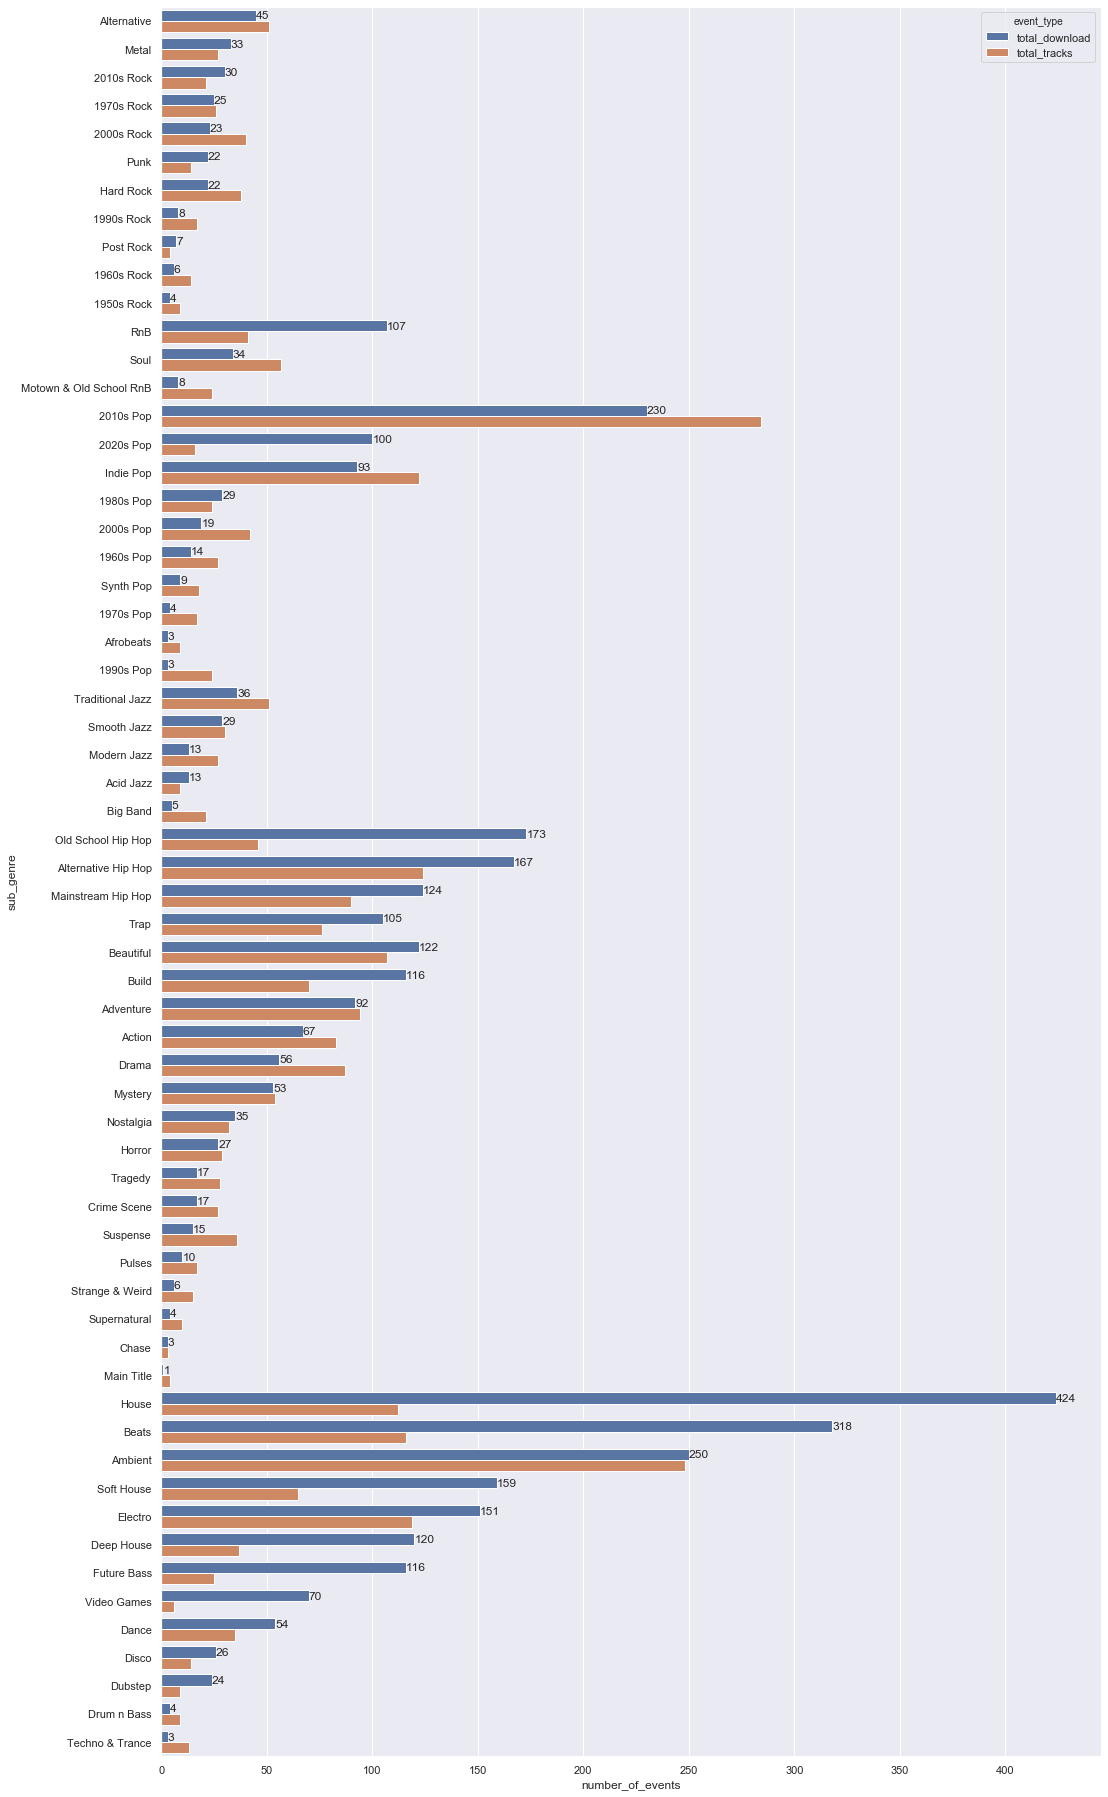

In [641]:
total_download_to_track_ratio_sb_t = total_download_to_track_ratio_sb.sort_values(['genre','total_download','sub_genre'], ascending=False )

test = pd.melt(total_download_to_track_ratio_sb_t, id_vars=['genre','sub_genre'], var_name="event_type", value_name="number_of_events")

test = test[(test['event_type'] == 'total_download') | (test['event_type'] == 'total_tracks')]

sns.set(rc = {'figure.figsize':(15,30)})
sns.barplot(y = 'sub_genre', x='number_of_events', data=test, ci=None, hue='event_type', orient='h')

download_event = test[(test['event_type'] == 'total_download')].sort_values(["genre","number_of_events","event_type"])

j = len(download_event)-1
for i in range(len(download_event)):
    plt.text(download_event.iloc[i,3],j, int(download_event.iloc[i ,3]) , ha="left", va="bottom", fontsize=12)
    j = j-1

#tracks = test[(test['event_type'] == 'download')].sort_values(["genre","number_of_events"])

#j = len(tracks)-0.5
#for i in range(len(tracks)):
#    plt.text(tracks.iloc[i,3],j, str( tracks.iloc[i ,3]), ha="left", va="bottom", fontsize=12)
#    j = j-1

In [626]:
tracks.head(5)

,genre,sub_genre,event_type,number_of_events
118,Electronica & Dance,Video Games,total_tracks,6.0
121,Electronica & Dance,Dubstep,total_tracks,9.0
122,Electronica & Dance,Drum n Bass,total_tracks,9.0
123,Electronica & Dance,Techno & Trance,total_tracks,13.0
120,Electronica & Dance,Disco,total_tracks,14.0


In [631]:
test.head()



,genre,sub_genre,event_type,number_of_events
0,Rock,Alternative,total_download,45.0
1,Rock,Metal,total_download,33.0
2,Rock,2010s Rock,total_download,30.0
3,Rock,1970s Rock,total_download,25.0
4,Rock,2000s Rock,total_download,23.0


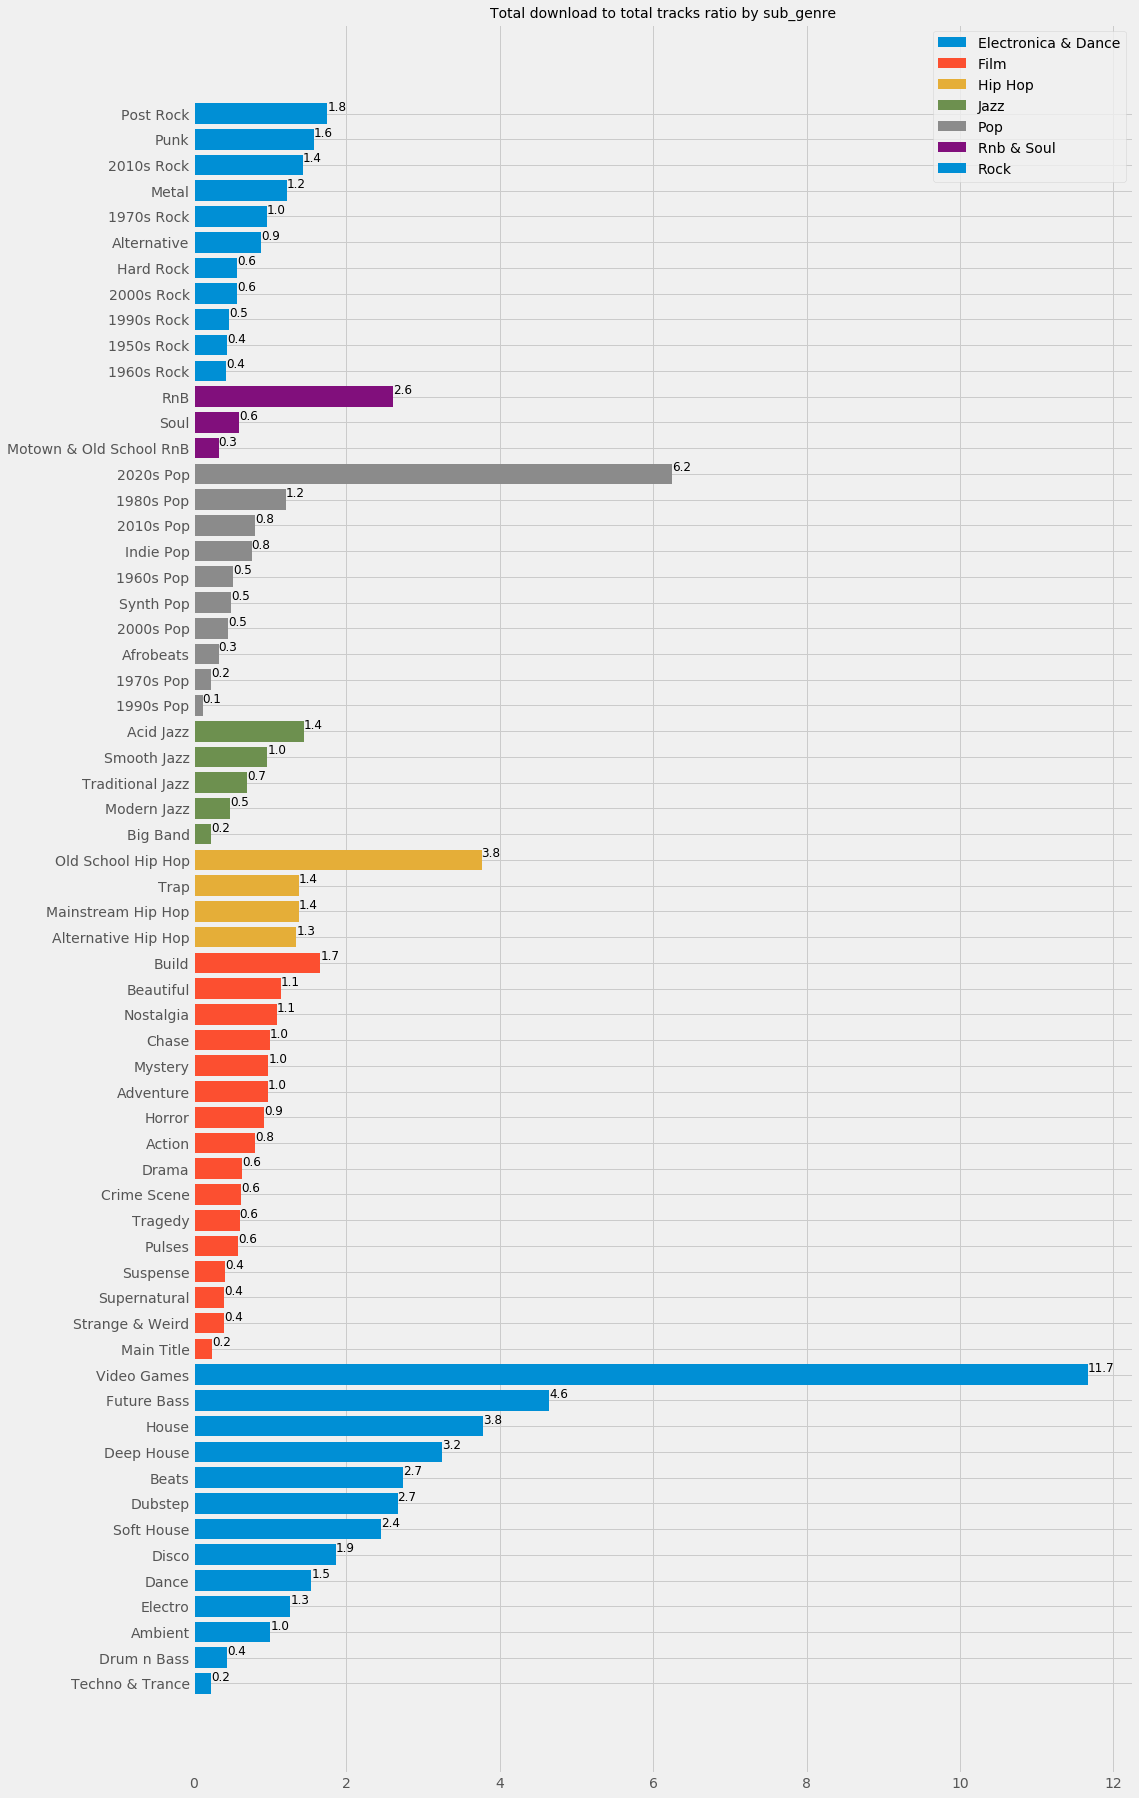

In [409]:
#total_download_to_track_ratio_sb = total_download_to_track_ratio_sb.sort_values('ratio') 

total_download_to_track_ratio_sb = total_download_to_track_ratio_sb.sort_values(['genre','ratio','sub_genre'], ascending=True)
    
fig = plt.gcf()
fig.set_size_inches(15, 30)

for i in range(0, total_download_to_track_ratio_sb['genre'].nunique()):
    genre_str = total_download_to_track_ratio_sb['genre'].unique()[i]
    df = total_download_to_track_ratio_sb[total_download_to_track_ratio_sb['genre'] == genre_str].sort_values(['genre','ratio','sub_genre'], ascending=True)
    plt.barh(df['sub_genre'], df['ratio'], label=genre_str)
    plt.legend()
    plt.title('Total download to total tracks ratio by sub_genre', fontsize=14)


tf = total_download_to_track_ratio_sb.sort_values(['genre','ratio','sub_genre'], ascending=False)    

j = len(tf)-1
for i in range(len(tf)):
    plt.text(tf.iloc[i,4],j, str( round(tf.iloc[i,4],1)), ha="left", va="bottom", fontsize=12)
    j = j-1

#### Question 3: How about on the sub-genre level?
#### Some sub-genre are doing well (they are dowloaded more times than # of available tracks), but in EDM particularly, most of subgenres have less tracks available than the # of download. Top 3 genre  are:  
- EDM: Video Games, Future Bass, House
- HipHop: Old-school hiphop
- Pop: 2020s Pop

In [671]:
df

,genre,sub_genre,total_play_events,percent
56,Rock,1980s Rock,19,0.461389
53,Rock,1950s Rock,42,1.019913
54,Rock,1960s Rock,88,2.136960
63,Rock,Post Rock,98,2.379796
57,Rock,1990s Rock,130,3.156872
64,Rock,Punk,254,6.168043
55,Rock,1970s Rock,311,7.552210
61,Rock,Hard Rock,342,8.305002
58,Rock,2000s Rock,503,12.214667
59,Rock,2010s Rock,506,12.287518


### Correlation

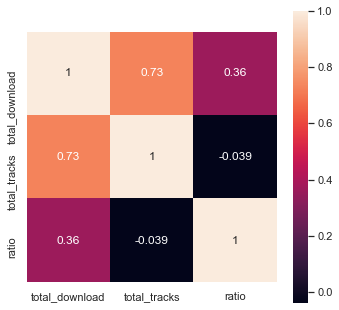

In [646]:
#Is there any correlation with the number of tracks with the number of download? Looks like it

fig = plt.gcf()
fig.set_size_inches(5, 5)

corr = total_download_to_track_ratio_sb.corr()
sns.heatmap(corr, annot=True, square=True)

In [390]:
total_download_to_track_ratio_sb

,genre,sub_genre,total_download,total_tracks,ratio
0,Electronica & Dance,Ambient,250,248,1.008065
1,Electronica & Dance,Beats,318,116,2.741379
2,Electronica & Dance,Dance,54,35,1.542857
3,Electronica & Dance,Deep House,120,37,3.243243
4,Electronica & Dance,Disco,26,14,1.857143
5,Electronica & Dance,Drum n Bass,4,9,0.444444
6,Electronica & Dance,Dubstep,24,9,2.666667
7,Electronica & Dance,Electro,151,119,1.268908
8,Electronica & Dance,Future Bass,116,25,4.640000
9,Electronica & Dance,House,424,112,3.785714


Text(0, 0.5, 'total tracks')

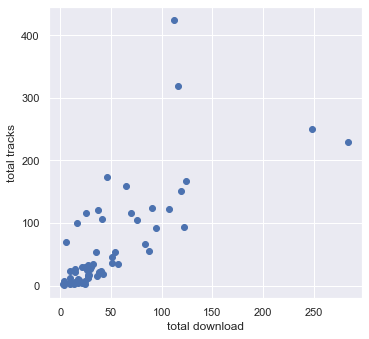

In [648]:

plt.scatter(total_download_to_track_ratio_sb['total_tracks'], total_download_to_track_ratio_sb['total_download'])
plt.xlabel('total download')
plt.ylabel('total tracks')

### Recommendation:
### Based on this, and any other observations you might have, how would you recommend for us to improve our music selection?



#### Recommendation:

1. For the ones that are super popular such as EDM, HipHop - we could explore similar musics and increase the offerings because it  seems that it is working, we can retain the current ones.

2. We can also increase the offering for those that have more downloads than the number of tracks such as:
 *) Video Games, 
 *) Future Bass,
 *) House,
 *) Beats,
 *) 2020s Pop, Old School Hip Hop

3. For the ones that are not super popular such as Jazz, RnB and Rock,  we need to looking for things that are slightly different. A few things that we can do to increase the # of download, we can ether increase the offerings (# of tracks), or diversify tracks, or maybe we can pick better artist or more popular artist. 
Or maybe, there is not lots of interest in this genre, I may need to deep dive to find out what was going on with Jazz, RnB, and Rock Genre  
